In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline  

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('01_heights_weights_genders.csv')

In [3]:
print(data.shape)
print(list(data.columns))

(10000, 3)
['Gender', 'Height', 'Weight']


In [4]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
data['target'] = data['Gender']

In [6]:
data['target'] = np.where(data["Gender"] == 'Male', 0, data['target'])
data['target'] = np.where(data["Gender"] == 'Female', 1, data['target'])

In [7]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [8]:
data["target"].unique()
data["target"] = data['target'].astype('int')

In [9]:
data['target'].value_counts()

1    5000
0    5000
Name: target, dtype: int64

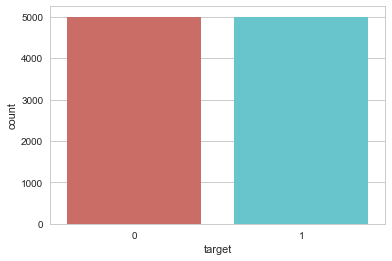

In [10]:
sns.countplot(x='target',data=data, palette ='hls')
plt.show()

In [11]:
data.groupby('target').mean()

,Height,Weight
target,,
0,69.026346,187.020621
1,63.708774,135.860093


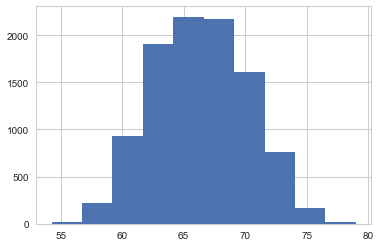

In [12]:
data.Height.hist()

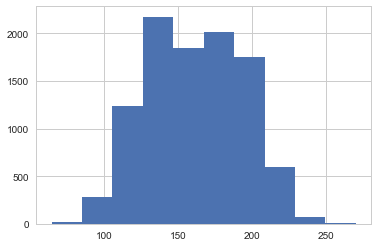

In [13]:
data.Weight.hist()

target
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Height, dtype: object

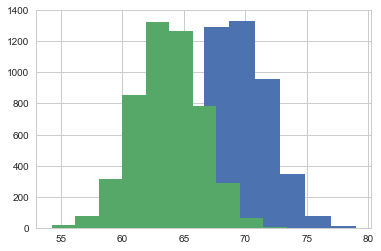

In [14]:
data.groupby('target').Height.hist()

target
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Weight, dtype: object

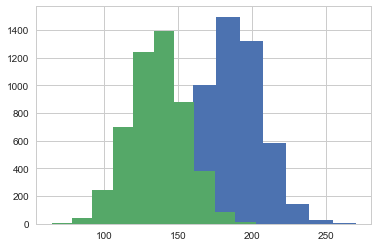

In [15]:
data.groupby('target').Weight.hist()

In [16]:
y = data['target']
X = data[['Weight','Height']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [17]:
logreg = LogisticRegression()

In [18]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
y_pred = logreg.predict(X_test)

In [20]:
y_probability = logreg.predict_proba(X_test)

In [21]:
logreg.score(X_test,y_test)

0.9186666666666666

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.93      0.91      0.92      1511
          1       0.91      0.93      0.92      1489

avg / total       0.92      0.92      0.92      3000



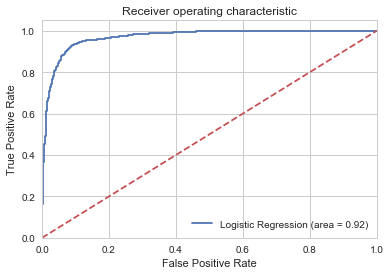

In [23]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [24]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1371  140]
 [ 104 1385]]


In [25]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.209143
         Iterations 8


AttributeError: module 'scipy.stats' has no attribute 'chisqprob'